In [78]:
import pandas as pandas
import matplotlib.pyplot as plot
import time
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt


In [72]:
def split_data(X,y):
    X_train, X_remaining, y_train, y_remaining = train_test_split(
        X, y, stratify=y, test_size=0.25, random_state= 0)
    X_test, X_holdout, y_test, y_holdout = train_test_split(X_remaining, y_remaining,
        stratify=y_remaining, test_size=0.3, random_state= 0)
    return X_train,y_train,X_test,y_test,X_holdout,y_holdout

def eval_metrics(test,pred,type="binary"):
    print("confusion matrix:",metrics.confusion_matrix(test,pred))
    print("accuracy:",metrics.accuracy_score(test,pred))

    if type == "binary":
        print("precision:",metrics.precision_score(test,pred))
        print("recall:",metrics.recall_score(test,pred))

    elif type == "multi":
        print("precision:",metrics.precision_score(test,pred,average="macro"))
        print("recall:",metrics.recall_score(test,pred,average="macro"))

def cv_holdout(mod,holdout_X, holdout_y,k=5):
    cv_scores = cross_val_score(mod,holdout_X,holdout_y,cv=k)
    print("Cross validated scores:",cv_scores)

# Voting

In [30]:
voting_train = pandas.read_csv("CongressionalVotingID.shuf.lrn.csv")

In [31]:
voting_train.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,249,republican,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,140,democrat,y,n,y,n,n,y,y,y,y,n,n,n,n,n,y,y
2,383,democrat,y,y,n,y,y,y,n,n,n,n,y,n,y,y,n,unknown
3,201,democrat,n,n,y,n,n,n,y,y,y,n,n,n,n,y,y,y
4,297,republican,n,n,y,y,y,y,n,n,n,y,n,y,y,y,y,y


In [32]:
voting_test = pandas.read_csv("CongressionalVotingID.shuf.tes.csv")

In [33]:
voting_test.head()

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,102,y,n,y,n,y,y,y,n,n,n,y,n,n,y,n,y
1,413,n,n,n,y,y,y,n,n,n,y,n,y,y,y,n,y
2,30,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
3,298,y,y,y,n,n,y,y,y,y,y,n,n,unknown,n,y,unknown
4,95,y,n,y,n,y,y,n,n,n,n,n,n,n,n,n,y


In [34]:
voting_train.shape

(218, 18)

In [35]:
voting_test.shape

(217, 17)

In [36]:
voting_train.columns

Index(['ID', 'class', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-crporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [37]:
voting_train = voting_train.set_index("ID")

<Axes: >

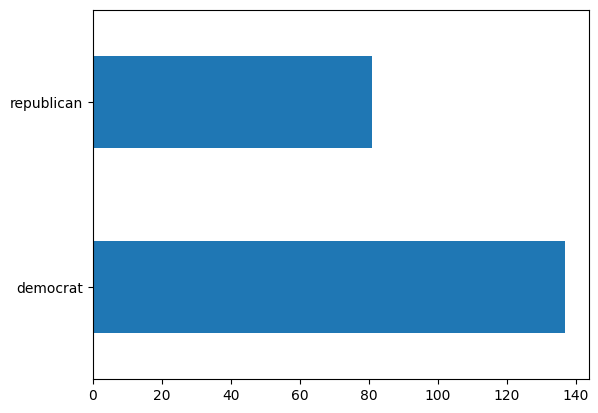

In [38]:
voting_train["class"].value_counts().plot(kind="barh")

In [39]:
(voting_train == "unknown").sum()

class                                      0
handicapped-infants                        7
water-project-cost-sharing                21
adoption-of-the-budget-resolution          4
physician-fee-freeze                       6
el-salvador-aid                            9
religious-groups-in-schools                5
anti-satellite-test-ban                    6
aid-to-nicaraguan-contras                 10
mx-missile                                12
immigration                                4
synfuels-crporation-cutback               13
education-spending                        16
superfund-right-to-sue                    14
crime                                      7
duty-free-exports                         14
export-administration-act-south-africa    58
dtype: int64

In [40]:
(voting_train == "unknown").sum(axis=1).sum()

206

In [41]:
unknown_values_by_id = (voting_train == "unknown").sum(axis=1)

In [42]:
unknown_values_by_id

ID
249    16
140     0
383     1
201     0
297     0
       ..
106     0
271     0
275     0
354     0
324     2
Length: 218, dtype: int64

In [43]:
unknown_values_by_id[unknown_values_by_id > 7].index

Int64Index([249], dtype='int64', name='ID')

In [44]:
index_to_remove = unknown_values_by_id[unknown_values_by_id > 7].index

In [45]:
index_to_remove

Int64Index([249], dtype='int64', name='ID')

In [46]:
voting_train = voting_train.drop(index=index_to_remove)

In [47]:
(voting_train == "unknown").sum()

class                                      0
handicapped-infants                        6
water-project-cost-sharing                20
adoption-of-the-budget-resolution          3
physician-fee-freeze                       5
el-salvador-aid                            8
religious-groups-in-schools                4
anti-satellite-test-ban                    5
aid-to-nicaraguan-contras                  9
mx-missile                                11
immigration                                3
synfuels-crporation-cutback               12
education-spending                        15
superfund-right-to-sue                    13
crime                                      6
duty-free-exports                         13
export-administration-act-south-africa    57
dtype: int64

In [48]:
labelEncoder = LabelEncoder()
labelEncoder.fit(voting_train["handicapped-infants"])
list(labelEncoder.classes_)

for col in voting_train.columns[1:]:
    voting_train[col] = labelEncoder.transform(voting_train[col])

In [49]:
LabelEncoder_class = LabelEncoder()
LabelEncoder_class.fit(voting_train["class"])
list(LabelEncoder_class.classes_)
voting_train["class"] = LabelEncoder_class.transform(voting_train["class"])

In [50]:
voting_train.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
ID,,,,,,,,,,,,,,,,,
140,0,2,0,2,0,0,2,2,2,2,0,0,0,0,0,2,2
383,0,2,2,0,2,2,2,0,0,0,0,2,0,2,2,0,1
201,0,0,0,2,0,0,0,2,2,2,0,0,0,0,2,2,2
297,1,0,0,2,2,2,2,0,0,0,2,0,2,2,2,2,2
309,1,0,0,0,2,2,2,0,0,0,2,0,2,2,2,0,0


In [66]:
X = voting_train.iloc[:,1:]
y = voting_train["class"]

In [68]:
X_train,y_train,X_test,y_test,X_holdout,y_holdout = split_data(X,y)

# Decision Tree

In [53]:
start_time = time.time()

In [69]:
vot_dec_classifier = DecisionTreeClassifier(random_state=0,criterion="gini") 
vot_dec_classifier = vot_dec_classifier.fit(X_train,y_train) 
prediction = vot_dec_classifier.predict(X_test) 
print("runtime: " , (time.time() - start_time))

runtime:  772.2958037853241


In [76]:
cv_holdout(vot_dec_classifier,X_holdout,y_holdout)
eval_metrics(y_test,prediction)

Cross validated scores: [1.         0.5        0.66666667 1.         0.66666667]
confusion matrix: [[23  1]
 [ 2 12]]
accuracy: 0.9210526315789473
precision: 0.9230769230769231
recall: 0.8571428571428571


[Text(0.6, 0.9285714285714286, 'x[3] <= 1.5\ngini = 0.466\nsamples = 162\nvalue = [102, 60]'),
 Text(0.4, 0.7857142857142857, 'x[2] <= 0.5\ngini = 0.02\nsamples = 99\nvalue = [98, 1]'),
 Text(0.3, 0.6428571428571429, 'x[1] <= 1.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2, 0.5, 'x[7] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5, 0.6428571428571429, 'gini = 0.0\nsamples = 91\nvalue = [91, 0]'),
 Text(0.8, 0.7857142857142857, 'x[11] <= 0.5\ngini = 0.119\nsamples = 63\nvalue = [4, 59]'),
 Text(0.7, 0.6428571428571429, 'x[9] <= 1.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.6, 0.5, 'x[10] <= 1.0\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.5, 0.35714285714285715, 'x[7] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.2

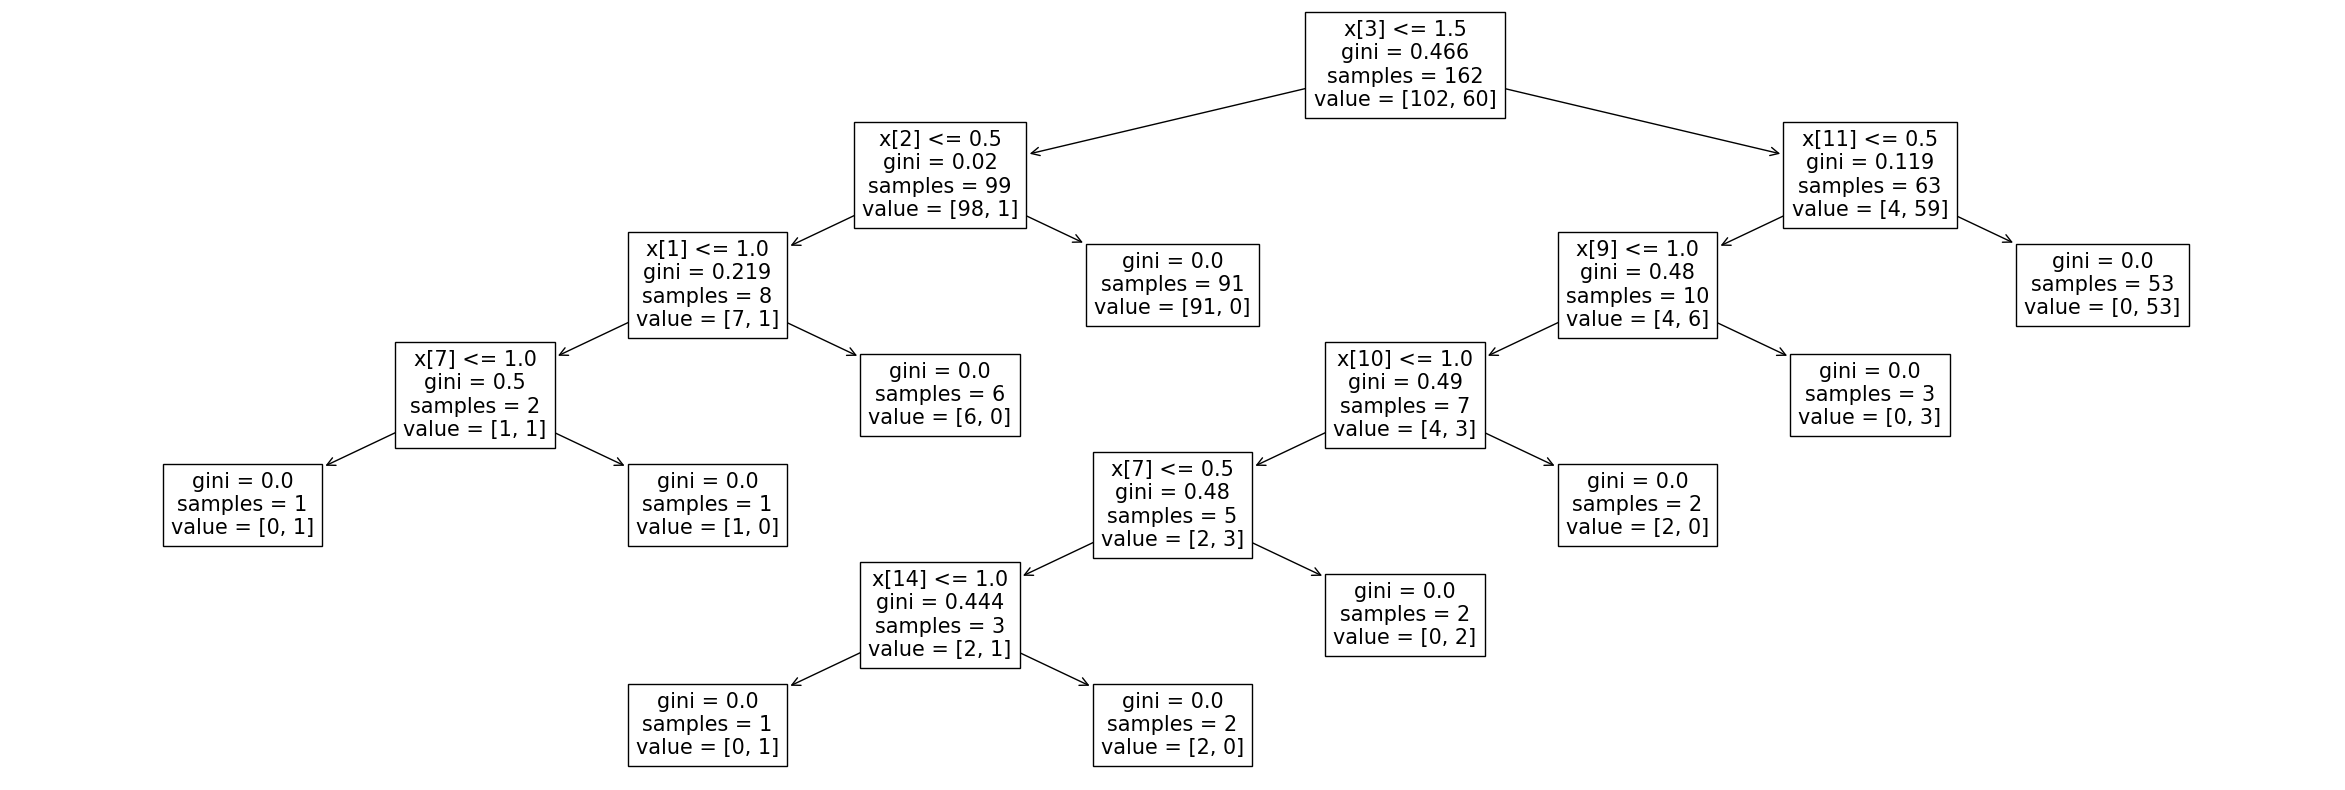

In [79]:
plt.figure(figsize=(30,10))
plot_tree(vot_dec_classifier)

In [80]:
vot_dec_classifier = DecisionTreeClassifier(random_state=0,criterion="entropy", min_samples_split=3) 
vot_dec_classifier = vot_dec_classifier.fit(X_train,y_train) 
prediction = vot_dec_classifier.predict(X_test) 
cv_holdout(vot_dec_classifier,X_holdout,y_holdout)
eval_metrics(y_test,prediction)

Cross validated scores: [1.         0.5        0.66666667 1.         0.66666667]
confusion matrix: [[24  0]
 [ 2 12]]
accuracy: 0.9473684210526315
precision: 1.0
recall: 0.8571428571428571


# Random Forest

In [83]:
start_time = time.time()
vot_rand_classifier = RandomForestClassifier(n_estimators=100,random_state=0)
vot_rand_classifier.fit(X_train,y_train)
vot_rand_prediction = vot_rand_classifier.predict(X_test)
print("runtime: " , (time.time() - start_time))

cv_holdout(vot_rand_classifier, X_holdout,y_holdout)
eval_metrics(y_test,vot_rand_prediction)



runtime:  0.11075210571289062
Cross validated scores: [1.         1.         0.66666667 1.         0.66666667]
confusion matrix: [[24  0]
 [ 3 11]]
accuracy: 0.9210526315789473
precision: 1.0
recall: 0.7857142857142857


In [84]:
start_time = time.time()
vot_rand_classifier = RandomForestClassifier(n_estimators=30,random_state=0,criterion="gini")
vot_rand_classifier.fit(X_train,y_train)
vot_rand_prediction = vot_rand_classifier.predict(X_test)
print("runtime: " , (time.time() - start_time))

cv_holdout(vot_rand_classifier, X_holdout,y_holdout)
eval_metrics(y_test,vot_rand_prediction)


runtime:  0.03954958915710449
Cross validated scores: [1.         1.         0.66666667 1.         1.        ]
confusion matrix: [[24  0]
 [ 2 12]]
accuracy: 0.9473684210526315
precision: 1.0
recall: 0.8571428571428571


# KNN

In [85]:
start_time = time.time()
vot_knn_classifier = KNeighborsClassifier(n_neighbors=5,metric="hamming")
vot_knn_classifier.fit(X_train,y_train)
knn_prediction = vot_knn_classifier.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(vot_knn_classifier, X_holdout, y_holdout)
eval_metrics(y_test, knn_prediction)


--- runtime --- 0.013703346252441406
Cross validated scores: [0.75       1.         0.66666667 1.         0.33333333]
confusion matrix: [[23  1]
 [ 3 11]]
accuracy: 0.8947368421052632
precision: 0.9166666666666666
recall: 0.7857142857142857


In [86]:
start_time = time.time()
vot_knn_classifier = KNeighborsClassifier(n_neighbors=10,metric="hamming")
vot_knn_classifier.fit(X_train,y_train)
knn_prediction = vot_knn_classifier.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(vot_knn_classifier, X_holdout, y_holdout)
eval_metrics(y_test, knn_prediction)

--- runtime --- 0.005606412887573242
Cross validated scores: [0.75       0.5        0.66666667 0.66666667 0.66666667]
confusion matrix: [[22  2]
 [ 3 11]]
accuracy: 0.868421052631579
precision: 0.8461538461538461
recall: 0.7857142857142857
